# **Analyzing and Forecasting Hotel Booking Demand**

Dataset can be downloaded from: 
https://drive.google.com/file/d/1YuS45dO_iTowCq0buTKcMHSpzDlKt1MS/view?usp=sharing

# **Load Packages**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 26.7 MB/s eta 0:00:00


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime
import statsmodels.api as sm
from plotly.subplots import make_subplots

from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_percentage_error
from scipy.stats import mode, norm, skew
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

colors = ['#302a75','#329C9D','#5EB7C4', '#A7D3E0']
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('.../hotel_bookings.csv')

# **Data Description**


In [5]:
df.head().T

,0,1,2,3,4
hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel
is_canceled,0,0,0,0,0
lead_time,342,737,7,13,14
arrival_date_year,2015,2015,2015,2015,2015
arrival_date_month,July,July,July,July,July
arrival_date_week_number,27,27,27,27,27
arrival_date_day_of_month,1,1,1,1,1
stays_in_weekend_nights,0,0,0,0,0
stays_in_week_nights,0,0,1,1,2
adults,2,2,1,1,2


In [6]:
df.shape

(119390, 32)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [8]:
df.describe(include = 'object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,926
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-10-21
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,1461


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [10]:
df['reservation_status_date']= pd.to_datetime(df['reservation_status_date'])

In [11]:
for col in df.columns:
    print(col)
    print('-'*50)

hotel
--------------------------------------------------
is_canceled
--------------------------------------------------
lead_time
--------------------------------------------------
arrival_date_year
--------------------------------------------------
arrival_date_month
--------------------------------------------------
arrival_date_week_number
--------------------------------------------------
arrival_date_day_of_month
--------------------------------------------------
stays_in_weekend_nights
--------------------------------------------------
stays_in_week_nights
--------------------------------------------------
adults
--------------------------------------------------
children
--------------------------------------------------
babies
--------------------------------------------------
meal
--------------------------------------------------
country
--------------------------------------------------
market_segment
--------------------------------------------------
distribution_channel
--

In [12]:
for col in df.describe().columns:
    print(col)
    print(df[col].unique())
    print('-'*100)

is_canceled
[0 1]
----------------------------------------------------------------------------------------------------
lead_time
[342 737   7  13  14   0   9  85  75  23  35  68  18  37  12  72 127  78
  48  60  77  99 118  95  96  69  45  40  15  36  43  70  16 107  47 113
  90  50  93  76   3   1  10   5  17  51  71  63  62 101   2  81 368 364
 324  79  21 109 102   4  98  92  26  73 115  86  52  29  30  33  32   8
 100  44  80  97  64  39  34  27  82  94 110 111  84  66 104  28 258 112
  65  67  55  88  54 292  83 105 280 394  24 103 366 249  22  91  11 108
 106  31  87  41 304 117  59  53  58 116  42 321  38  56  49 317   6  57
  19  25 315 123  46  89  61 312 299 130  74 298 119  20 286 136 129 124
 327 131 460 140 114 139 122 137 126 120 128 135 150 143 151 132 125 157
 147 138 156 164 346 159 160 161 333 381 149 154 297 163 314 155 323 340
 356 142 328 144 336 248 302 175 344 382 146 170 166 338 167 310 148 165
 172 171 145 121 178 305 173 152 354 347 158 185 349 183 352 177 200

In [13]:
for col in df.describe(include='object').columns:
    print(col)
    print(df[col].unique())
    print('-'*100)

hotel
['Resort Hotel' 'City Hotel']
----------------------------------------------------------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
----------------------------------------------------------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
----------------------------------------------------------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK

In [14]:
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [15]:
null_cols = ['company', 'agent', 'country']
for col in null_cols:
    null_percentage = (df[col].isnull().sum() / len(df)) * 100
    print(f"% of null in {col}: {null_percentage:.2f}%")

% of null in company: 94.31%
% of null in agent: 13.69%
% of null in country: 0.41%


In [16]:
df.drop(['company','agent'], axis =1, inplace = True)
df.dropna(inplace =True)

In [17]:
df.isnull().sum().max()

0

In [18]:
df.duplicated().sum()

31984

In [19]:
duplicate_percentage = (df.duplicated().sum() / len(df)) * 100
print(f"% of duplicates: {duplicate_percentage:.2f}%")

% of duplicates: 26.90%


###Individuals who are not canceled are included for comprehensive data insights.

In [20]:
rhotel = df.loc[(df["hotel"] == "Resort Hotel") & (df["is_canceled"] == 0)]
chotel = df.loc[(df["hotel"] == "City Hotel") & (df["is_canceled"] == 0)]

In [21]:
resort_df = df[df['hotel'] == 'Resort Hotel']
city_df = df[df['hotel'] == 'City Hotel']

# **Data-Driven Strategy for Optimizing Hotel Room Expansion Plans**

### How do room type affect

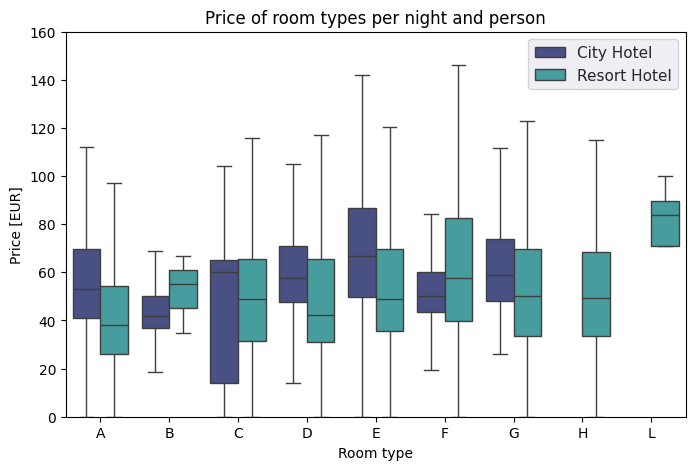

In [22]:
# Price per person comparison

df["adr_pp"] = df["adr"] / (df["adults"] + df["children"])
df = df[(df['adr_pp'] >= 0) & (df['adr_pp'] < 5000)]
full_data_guests = df.loc[df["is_canceled"] == 0]
full_data_guests = full_data_guests.dropna()
room_prices = full_data_guests[["hotel", "reserved_room_type", "adr_pp"]].sort_values("reserved_room_type")
plt.figure(figsize=(8, 5))
sns.boxplot(x="reserved_room_type",
            y="adr_pp",
            hue="hotel",
            data=room_prices,
            hue_order=["City Hotel", "Resort Hotel"],
            fliersize=0,
            palette='mako')
sns.set(style='darkgrid')
plt.title("Price of room types per night and person")
plt.xlabel("Room type")
plt.ylabel("Price [EUR]")
plt.legend(loc="upper right")
plt.ylim(0, 160)
plt.show()

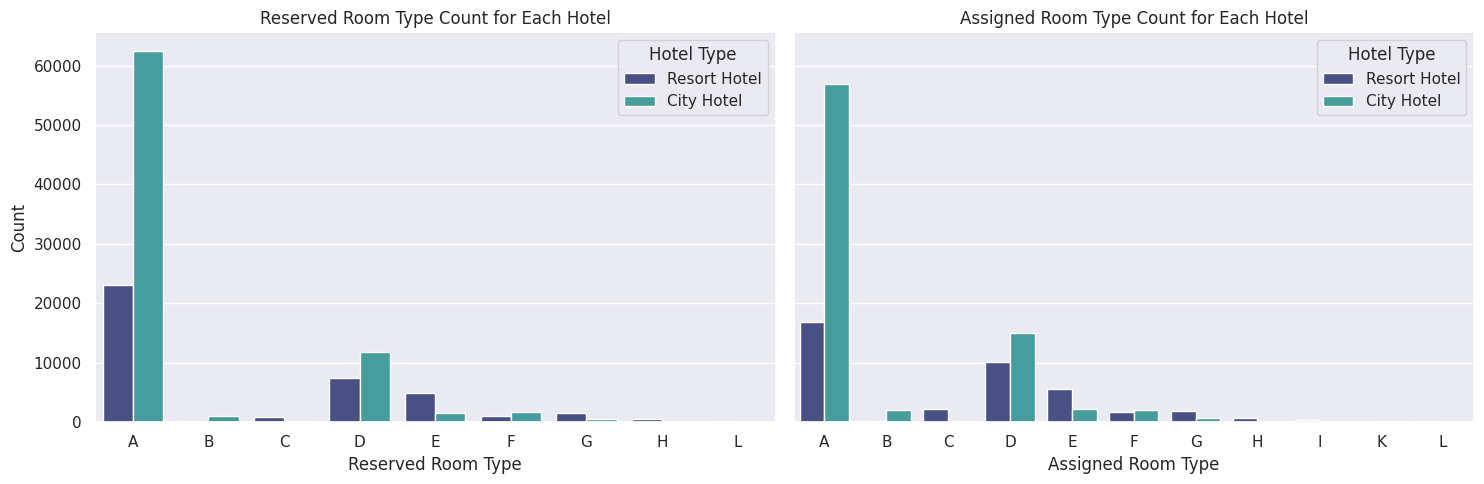

In [23]:
df['reserved_room_type'] = pd.Categorical(df['reserved_room_type'], categories=sorted(df['reserved_room_type'].unique()), ordered=True)
df['assigned_room_type'] = pd.Categorical(df['assigned_room_type'], categories=sorted(df['assigned_room_type'].unique()), ordered=True)
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
sns.countplot(ax=axes[0], x='reserved_room_type', hue='hotel', data=df, palette='mako')
axes[0].set_title('Reserved Room Type Count for Each Hotel')
axes[0].set_xlabel('Reserved Room Type')
axes[0].set_ylabel('Count')
axes[0].legend(title='Hotel Type')
sns.countplot(ax=axes[1], x='assigned_room_type', hue='hotel', data=df, palette='mako')
axes[1].set_title('Assigned Room Type Count for Each Hotel')
axes[1].set_xlabel('Assigned Room Type')
axes[1].set_ylabel('Count')
axes[1].legend(title='Hotel Type')
for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.tight_layout()
plt.show()

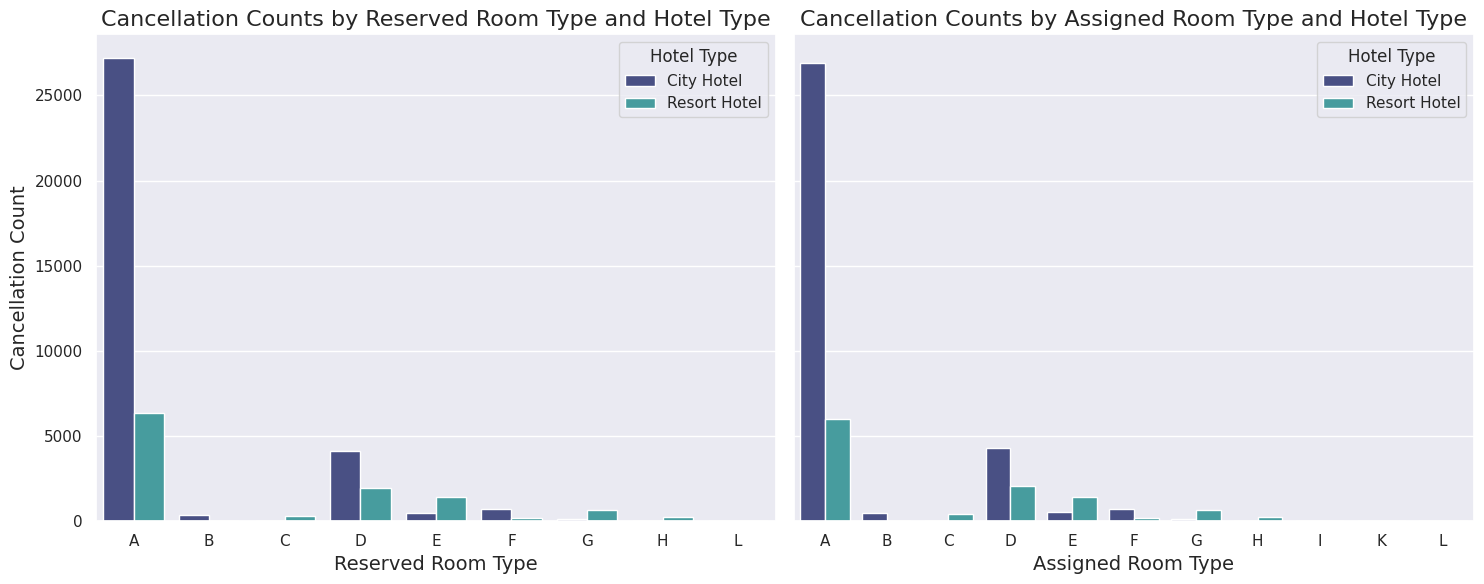

In [24]:
df['reserved_room_type'] = pd.Categorical(df['reserved_room_type'], categories=sorted(df['reserved_room_type'].unique()), ordered=True)
df['assigned_room_type'] = pd.Categorical(df['assigned_room_type'], categories=sorted(df['assigned_room_type'].unique()), ordered=True)
reserved_cancellation_summary = df[df['is_canceled'] == 1].groupby(['hotel', 'reserved_room_type']).size().reset_index(name='cancellation_count_reserved')
assigned_cancellation_summary = df[df['is_canceled'] == 1].groupby(['hotel', 'assigned_room_type']).size().reset_index(name='cancellation_count_assigned')
fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)
sns.barplot(ax=axes[0], x='reserved_room_type', y='cancellation_count_reserved', hue='hotel', data=reserved_cancellation_summary, palette='mako')
axes[0].set_title('Cancellation Counts by Reserved Room Type and Hotel Type', fontsize=16)
axes[0].set_xlabel('Reserved Room Type', fontsize=14)
axes[0].set_ylabel('Cancellation Count', fontsize=14)
axes[0].legend(title='Hotel Type')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)
sns.barplot(ax=axes[1], x='assigned_room_type', y='cancellation_count_assigned', hue='hotel', data=assigned_cancellation_summary, palette='mako')
axes[1].set_title('Cancellation Counts by Assigned Room Type and Hotel Type', fontsize=16)
axes[1].set_xlabel('Assigned Room Type', fontsize=14)
axes[1].set_ylabel('Cancellation Count', fontsize=14)
axes[1].legend(title='Hotel Type')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)
plt.tight_layout()
plt.show()

In [25]:
reserved_cancellation_summary

,hotel,reserved_room_type,cancellation_count_reserved
0,City Hotel,A,27229
1,City Hotel,B,363
2,City Hotel,C,5
3,City Hotel,D,4146
4,City Hotel,E,499
5,City Hotel,F,700
6,City Hotel,G,119
7,City Hotel,H,0
8,City Hotel,L,0
9,Resort Hotel,A,6345


In [26]:
assigned_cancellation_summary

,hotel,assigned_room_type,cancellation_count_assigned
0,City Hotel,A,26882
1,City Hotel,B,498
2,City Hotel,C,15
3,City Hotel,D,4273
4,City Hotel,E,534
5,City Hotel,F,719
6,City Hotel,G,129
7,City Hotel,H,0
8,City Hotel,I,0
9,City Hotel,K,11


### Identify key Market segments

In [27]:
segments_df = df["market_segment"].value_counts()
segments_rhotel = rhotel["market_segment"].value_counts()
segments_chotel = chotel["market_segment"].value_counts()
fig = make_subplots(rows=1, cols=3, specs=[[{'type': 'domain'}, {'type': 'domain'}, {'type': 'domain'}]],
                    subplot_titles=("Bookings per market segment",
                                    "Bookings per market segment in Resort Hotel",
                                    "Bookings per market segment in City Hotel"))
fig.add_trace(px.pie(segments_df,
                     values=segments_df.values,
                     names=segments_df.index,
                     color_discrete_sequence=colors).data[0], row=1, col=1)
fig.add_trace(px.pie(segments_rhotel,
                     values=segments_rhotel.values,
                     names=segments_rhotel.index,
                     color_discrete_sequence=colors).data[0], row=1, col=2)
fig.add_trace(px.pie(segments_chotel,
                     values=segments_chotel.values,
                     names=segments_chotel.index,
                     color_discrete_sequence=colors).data[0], row=1, col=3)

fig.update_traces(rotation=-90, textinfo="percent+label")
fig.update_layout(height=600, width=1300, template="seaborn", showlegend=False)
fig.show()

### How long do people stay at the hotels?

In [28]:
resort_df["total_nights"] = resort_df["stays_in_weekend_nights"] + resort_df["stays_in_week_nights"]
num_nights_res = list(resort_df["total_nights"].value_counts().index)
num_bookings_res = list(resort_df["total_nights"].value_counts())
rel_bookings_res = resort_df["total_nights"].value_counts() / sum(num_bookings_res) * 100
res_nights = pd.DataFrame({"hotel": "Resort hotel",
                           "num_nights": num_nights_res,
                           "rel_num_bookings": rel_bookings_res})
nights_data = pd.concat([res_nights], ignore_index=True)

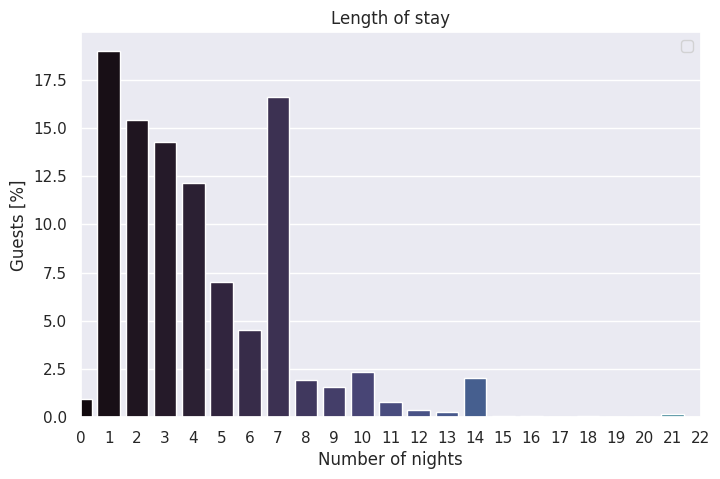

In [29]:
plt.figure(figsize=(8, 5))
sns.barplot(x = "num_nights", y = "rel_num_bookings", data=nights_data, color='#FF5733', palette='mako')
plt.title("Length of stay")
plt.xlabel("Number of nights")
plt.ylabel("Guests [%]")
plt.legend(loc="upper right")
plt.xlim(0,22)
plt.show()

### Distribution of waiting list

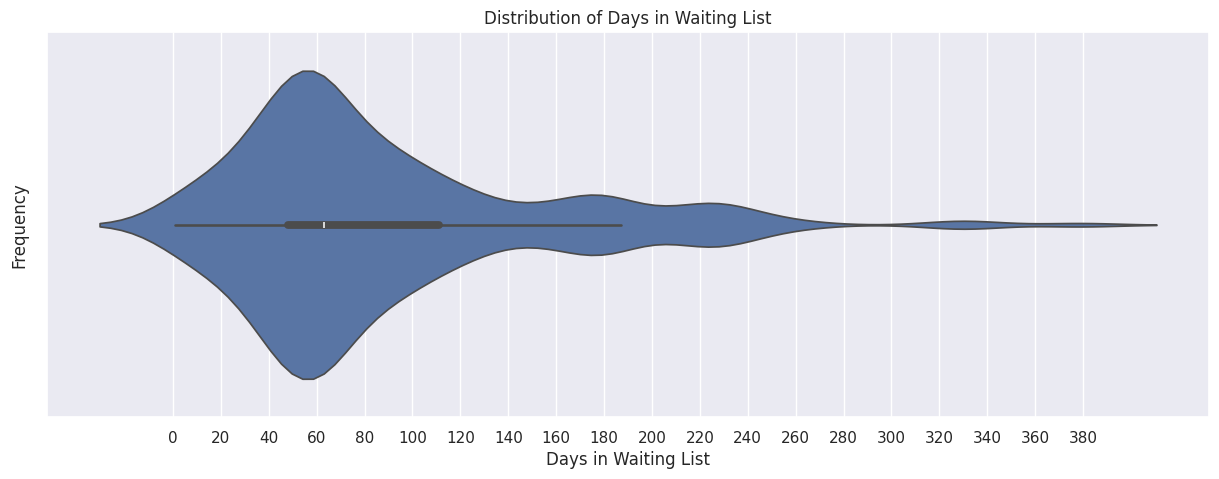

In [30]:
plt.figure(figsize=(15, 5))
filtered_data = full_data_guests[full_data_guests['days_in_waiting_list'] > 0]
sns.violinplot(x='days_in_waiting_list', data=filtered_data)
plt.title('Distribution of Days in Waiting List')
plt.xlabel('Days in Waiting List')
plt.ylabel('Frequency')
plt.xticks(ticks=range(0, filtered_data['days_in_waiting_list'].max() + 20, 20))
plt.show()

### Parking Requirements

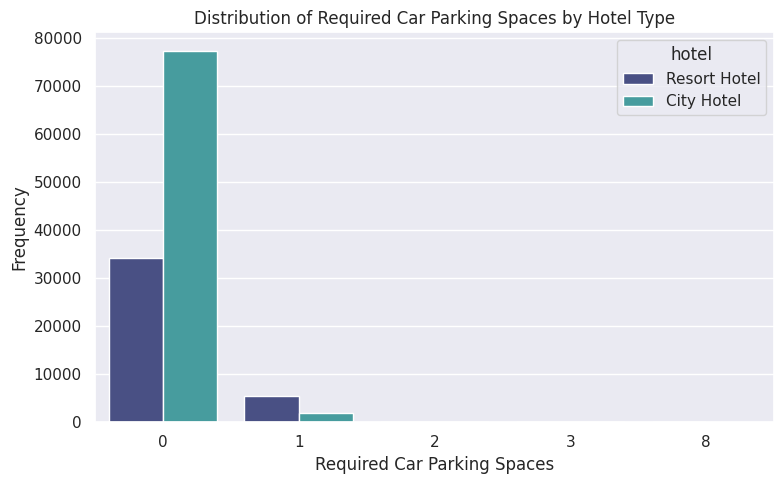

In [31]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df,
              x='required_car_parking_spaces',
              hue='hotel',
              palette='mako')
plt.title('Distribution of Required Car Parking Spaces by Hotel Type')
plt.xlabel('Required Car Parking Spaces')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# **Data-Driven Advisory for Maximizing Additional Revenue from Resort Footfall**

### Lead Time

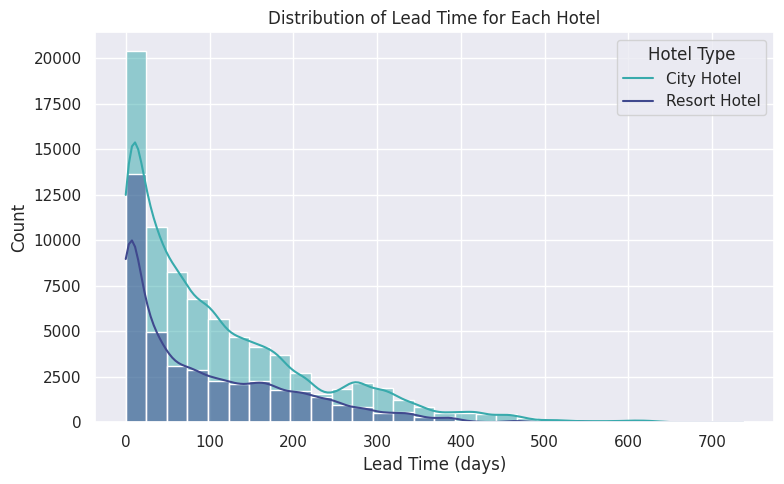

In [32]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='lead_time', hue='hotel', kde=True, palette='mako', bins=30)
plt.title('Distribution of Lead Time for Each Hotel')
plt.xlabel('Lead Time (days)')
plt.ylabel('Count')
plt.legend(title='Hotel Type',labels=['City Hotel', 'Resort Hotel'])
plt.tight_layout()
plt.show()

In [33]:
bins = [i for i in range(0, 90, 2)]
labels = [f'{bins[i]}-{bins[i + 1] - 1} days' for i in range(len(bins) - 1)]
df['lead_time_category'] = pd.cut(df['lead_time'], bins=bins, labels=labels,right=True)
df['lead_time_category'] = pd.Categorical(df['lead_time_category'], categories=labels,ordered=True)
fig = px.histogram(df,
                   x='lead_time_category',
                   color='hotel',
                   title='Distribution of Lead Time for Each Hotel',
                   labels={'lead_time_category': 'Lead Time (days)', 'hotel': 'Hotel Type'},
                   color_discrete_sequence=colors,
                   opacity=0.75)
fig.update_layout(bargap=0.1,
                  xaxis_title='Lead Time (days)',
                  yaxis_title='Count',
                  legend_title_text='Hotel Type',
                  xaxis_tickangle=-45)
fig.show()

### Customer Type Analysis

In [34]:
segments_df = df["customer_type"].value_counts()
segments_rhotel = rhotel["customer_type"].value_counts()
segments_chotel = chotel["customer_type"].value_counts()
fig = make_subplots(rows=1, cols=3, specs=[[{'type': 'domain'}, {'type': 'domain'}, {'type': 'domain'}]],
                    subplot_titles=("Bookings per customer segment",
                                    "Bookings per customer segment in Resort Hotel",
                                    "Bookings per customer segment in City Hotel"))
fig.add_trace(px.pie(segments_df,
                     values=segments_df.values,
                     names=segments_df.index,
                     color_discrete_sequence=colors).data[0], row=1, col=1)
fig.add_trace(px.pie(segments_rhotel,
                     values=segments_rhotel.values,
                     names=segments_rhotel.index,
                     color_discrete_sequence=colors).data[0], row=1, col=2)
fig.add_trace(px.pie(segments_chotel,
                     values=segments_chotel.values,
                     names=segments_chotel.index,
                     color_discrete_sequence=colors).data[0], row=1, col=3)

fig.update_traces(rotation=-90, textinfo="percent+label")
fig.update_layout(height=600, width=1300, template="seaborn", showlegend=False)
fig.show()

### Which are the most busy month?

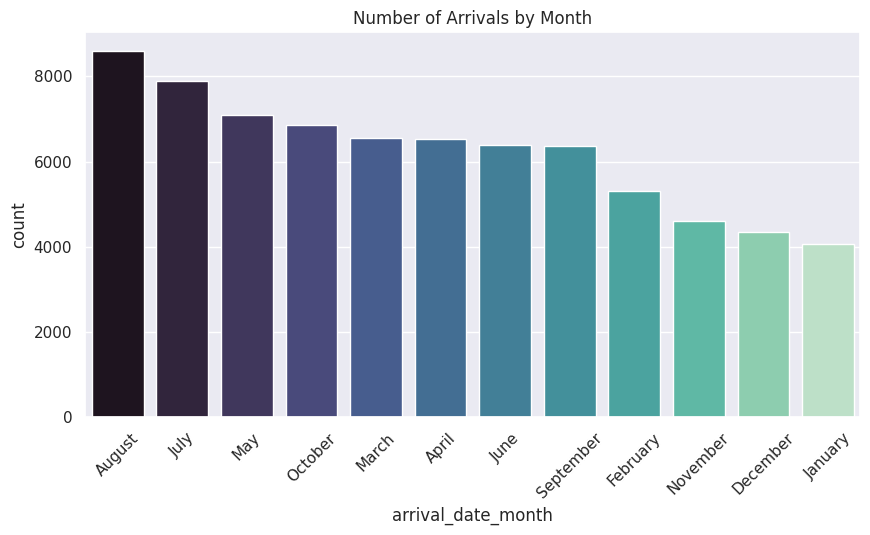

In [35]:
month_counts = full_data_guests['arrival_date_month'].value_counts()
sorted_months = month_counts.index
plt.figure(figsize=(10, 5), dpi=100)
sns.countplot(data=full_data_guests, x='arrival_date_month', palette="mako", order=sorted_months)
plt.xticks(rotation=45)
plt.title('Number of Arrivals by Month')
plt.show()

### Comprehensive interpretation

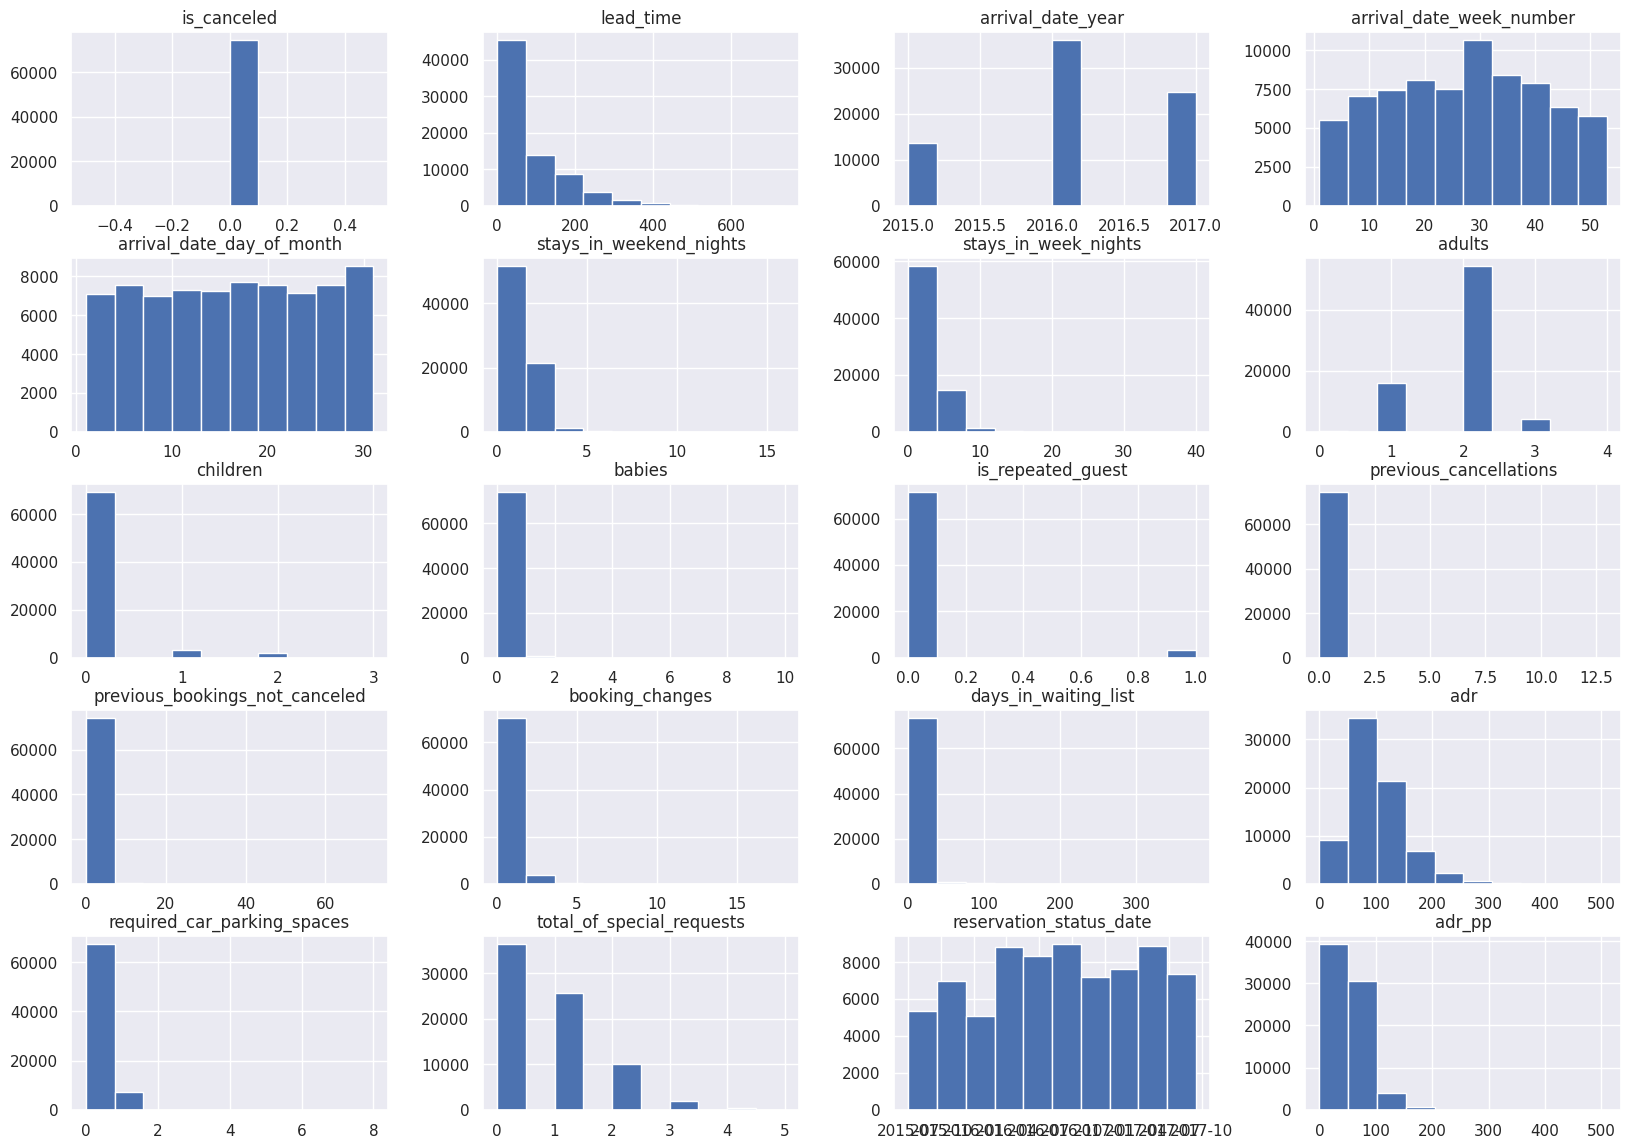

In [36]:
full_data_guests.hist(figsize=(20,14))
plt.show()

### Type of meal booked

In [37]:
meals_counts = df['meal'].value_counts().reset_index()
meals_counts.columns = ['meal', 'count']
fig = px.pie(meals_counts, values='count', names='meal', title='Distribution of Meals', color_discrete_sequence=colors)
fig.show()

### Effect of pricing over cancelation

102.13435646483109


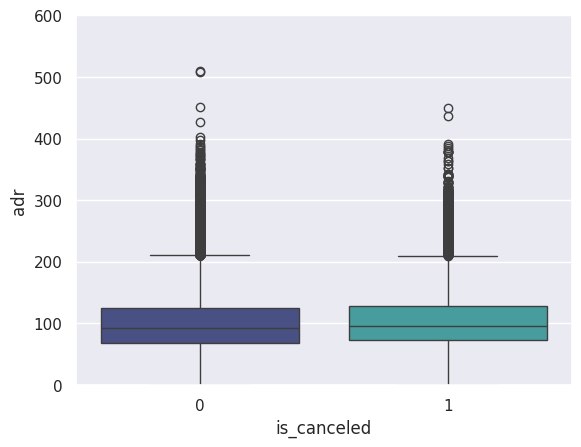

In [38]:
sns.boxplot(data= df,x = 'is_canceled', y='adr', palette="mako")
plt.ylim(0,600)
print(df['adr'].mean())

# **Advice for Smooth Resort Operations Based on Data Findings**

### More number of visitors from which country

In [39]:
country_data = pd.DataFrame(df.loc[df["is_canceled"] == 0]["country"].value_counts())
country_data.columns = ["Number_of_Guests"]
total_guests = country_data["Number_of_Guests"].sum()
country_data["Guests in %"] = round(country_data["Number_of_Guests"] / total_guests * 100, 2)
country_data = country_data.reset_index().rename(columns={"index": "country"})
country_data.loc[country_data["Guests in %"] < 1, "country"] = "Other"
fig = px.pie(country_data,
             values="Number_of_Guests",
             names="country",
             title="Home Country of Guests",
             template="seaborn")
fig.update_traces(textposition="inside", textinfo="value+percent+label")
fig.show()

###How Much Do Guests Pay Per Night?

In [40]:
rhotel["adr_pp"] = rhotel["adr"] / (rhotel["adults"] + rhotel["children"])
rhotel = rhotel[(rhotel['adr_pp'] >= 0) & (rhotel['adr_pp'] < 5000)]
chotel["adr_pp"] = chotel["adr"] / (chotel["adults"] + chotel["children"])
chotel = chotel[(chotel['adr_pp'] >= 0) & (chotel['adr_pp'] < 5000)]

In [41]:
print("""average prices are:
Resort hotel: {:.2f} € per night and person.
City hotel: {:.2f} € per night and person."""
      .format(rhotel["adr_pp"].mean(), chotel["adr_pp"].mean()))

average prices are:
Resort hotel: 47.55 € per night and person.
City hotel: 59.27 € per night and person.


### Effect of deposit type on cacelation

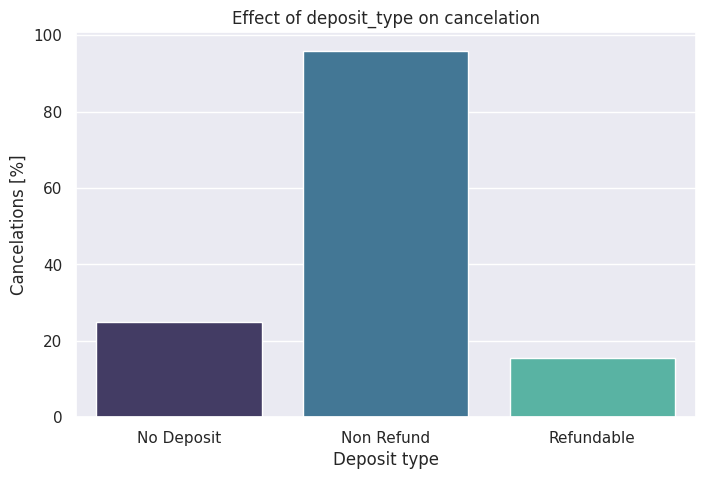

In [42]:
deposit_cancel_data = resort_df.groupby("deposit_type")["is_canceled"].describe()
plt.figure(figsize=(8, 5))
sns.barplot(x=deposit_cancel_data.index, y=deposit_cancel_data["mean"] * 100, palette='mako')
plt.title("Effect of deposit_type on cancelation")
plt.xlabel("Deposit type")
plt.ylabel("Cancelations [%]")
plt.show()

### How does the price per night vary over the year?

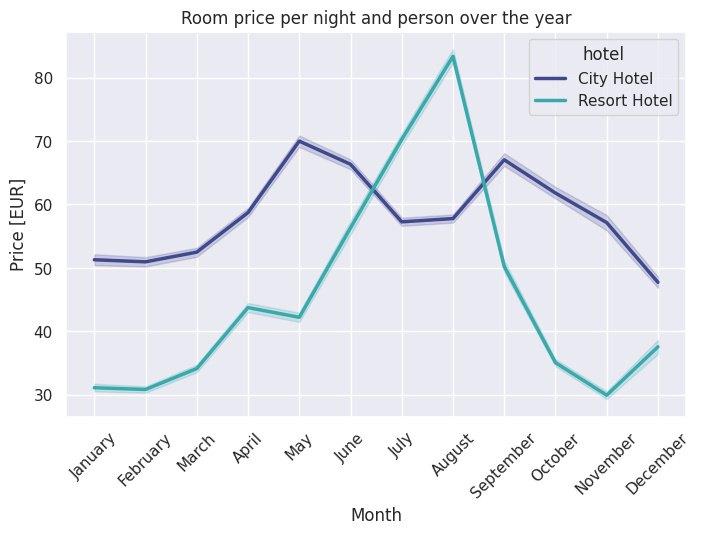

In [44]:
ordered_months = ["January", "February", "March", "April", "May", "June",
                  "July", "August", "September", "October", "November", "December"]
room_prices_mothly = full_data_guests[["hotel", "arrival_date_month", "adr_pp"]].sort_values("arrival_date_month")
room_prices_mothly["arrival_date_month"] = pd.Categorical(room_prices_mothly["arrival_date_month"], categories=ordered_months, ordered=True)

plt.figure(figsize=(8, 5))
sns.lineplot(x = "arrival_date_month", y="adr_pp", hue="hotel", data=room_prices_mothly,
            hue_order = ["City Hotel", "Resort Hotel"], size="hotel", sizes=(2.5, 2.5), palette='mako')
plt.title("Room price per night and person over the year")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.ylabel("Price [EUR]")
plt.show()

### Average number of guests per month

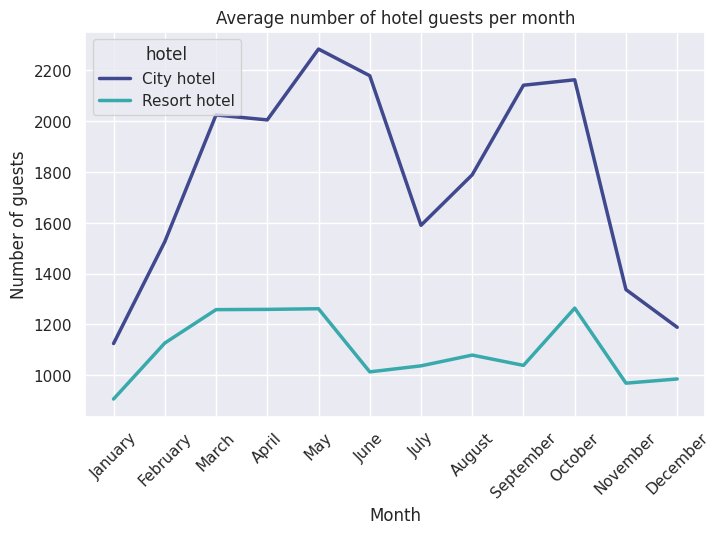

In [45]:
resort_guests_monthly = rhotel.groupby("arrival_date_month")["hotel"].count()
city_guests_monthly = chotel.groupby("arrival_date_month")["hotel"].count()

resort_guest_data = pd.DataFrame({"month": list(resort_guests_monthly.index),
                    "hotel": "Resort hotel",
                    "guests": list(resort_guests_monthly.values)})

city_guest_data = pd.DataFrame({"month": list(city_guests_monthly.index),
                    "hotel": "City hotel",
                    "guests": list(city_guests_monthly.values)})
full_guest_data = pd.concat([resort_guest_data,city_guest_data], ignore_index=True)
full_guest_data["month"] = pd.Categorical(full_guest_data["month"], categories=ordered_months, ordered=True)

full_guest_data.loc[(full_guest_data["month"] == "July") | (full_guest_data["month"] == "August"),
                    "guests"] /= 3
full_guest_data.loc[~((full_guest_data["month"] == "July") | (full_guest_data["month"] == "August")),
                    "guests"] /= 2
plt.figure(figsize=(8, 5))
sns.lineplot(x = "month", y="guests", hue="hotel", data=full_guest_data,
             hue_order = ["City hotel", "Resort hotel"], size="hotel", palette='mako', sizes=(2.5, 2.5))
plt.title("Average number of hotel guests per month")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.ylabel("Number of guests")
plt.show()

### How many bookings were canceled?

In [46]:
resort_df = df[df['hotel'] == 'Resort Hotel']
resort_bookings = resort_df.groupby([resort_df['reservation_status_date'].dt.month, 'is_canceled'])['is_canceled'].count().unstack().fillna(0)

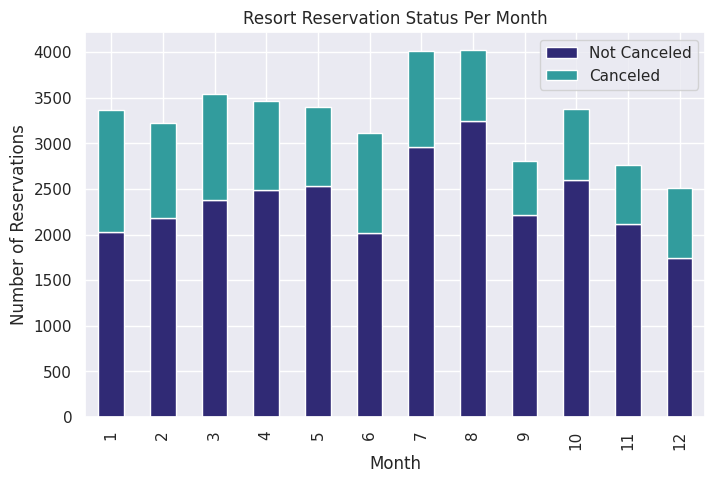

In [47]:
fig, ax = plt.subplots(figsize=(8, 5))
resort_bookings.plot(kind='bar', stacked=True, ax=ax, color=colors)
plt.title('Resort Reservation Status Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Reservations')
plt.legend(['Not Canceled', 'Canceled'])
plt.show()

### Which month have the highest number of cancelations?

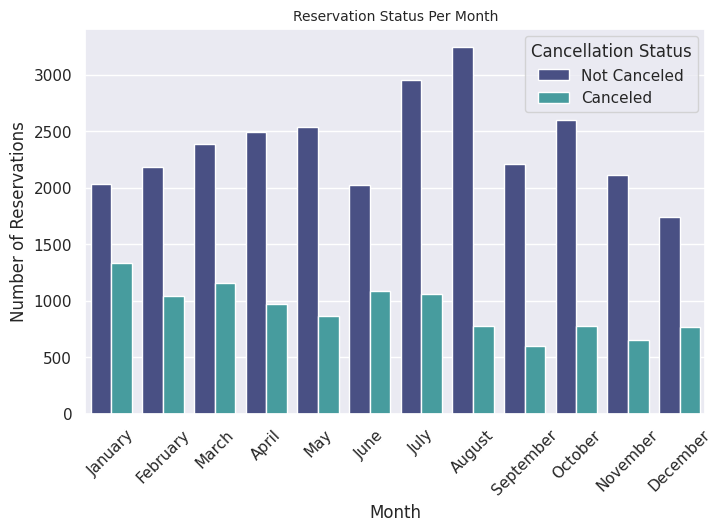

In [48]:
df['month_name'] = df['reservation_status_date'].dt.month_name()
resort_df = df[df['hotel'] == 'Resort Hotel']
plt.figure(figsize=(8, 5))
ax1 = sns.countplot(x='month_name', hue='is_canceled', data=resort_df, palette='mako', order=ordered_months)
plt.title('Reservation Status Per Month', size=10)
plt.xlabel('Month')
plt.ylabel('Number of Reservations')
plt.legend(title='Cancellation Status', labels=['Not Canceled', 'Canceled'])
plt.xticks(rotation=45)
plt.show()

# **Forecasting Demand for the Next 6 Months for Resort/Hotel Operations**

### Calculating total guests for each record

In [49]:
data = df

In [50]:
data['arrival_date'] = pd.to_datetime(data['arrival_date_year'].astype(str) + '-' +
                                      data['arrival_date_month'].str[0:3] + '-' +
                                      data['arrival_date_day_of_month'].astype(str), format='%Y-%b-%d')
data = data.drop(['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month', 'arrival_date_week_number'], axis=1)
data.head()

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,adr_pp,lead_time_category,month_name,arrival_date
0,Resort Hotel,0,342,0,0,2,0.0,0,BB,PRT,...,Transient,0.0,0,0,Check-Out,2015-07-01,0.0,NaN,July,2015-07-01
1,Resort Hotel,0,737,0,0,2,0.0,0,BB,PRT,...,Transient,0.0,0,0,Check-Out,2015-07-01,0.0,NaN,July,2015-07-01
2,Resort Hotel,0,7,0,1,1,0.0,0,BB,GBR,...,Transient,75.0,0,0,Check-Out,2015-07-02,75.0,6-7 days,July,2015-07-01
3,Resort Hotel,0,13,0,1,1,0.0,0,BB,GBR,...,Transient,75.0,0,0,Check-Out,2015-07-02,75.0,12-13 days,July,2015-07-01
4,Resort Hotel,0,14,0,2,2,0.0,0,BB,GBR,...,Transient,98.0,0,1,Check-Out,2015-07-03,49.0,12-13 days,July,2015-07-01


In [51]:
data['arrival_date'] = pd.to_datetime(data['arrival_date'])

In [52]:
data['Total Guests'] = data['adults'] + data['children']
data = data[data['Total Guests'] != 0]
data['Total Stays'] = data['stays_in_weekend_nights'] + data['stays_in_week_nights']
dataNoCancel = data[data['is_canceled'] == 0]
dataNoCancel = dataNoCancel.reset_index(drop=True)
NumberOfGuests = dataNoCancel[['arrival_date', 'Total Guests']]
NumberOfGuests

,arrival_date,Total Guests
0,2015-07-01,2.0
1,2015-07-01,2.0
2,2015-07-01,1.0
3,2015-07-01,1.0
4,2015-07-01,2.0
...,...,...
74584,2017-08-30,2.0
74585,2017-08-31,3.0
74586,2017-08-31,2.0
74587,2017-08-31,2.0


In [53]:
NumberOfGuests = dataNoCancel[['arrival_date', 'Total Guests']]
NumberOfGuests_Daily = dataNoCancel['Total Guests'].groupby(dataNoCancel['arrival_date']).sum()
NumberOfGuests_Daily = NumberOfGuests_Daily.resample('d').sum().to_frame()
NumberOfGuests_Daily

,Total Guests
arrival_date,
2015-07-01,183.0
2015-07-02,73.0
2015-07-03,77.0
2015-07-04,94.0
2015-07-05,80.0
...,...
2017-08-27,265.0
2017-08-28,247.0
2017-08-29,150.0


In [54]:
lis=[]
for x in NumberOfGuests_Daily.index:
    lis.append(x.day_name())
days = pd.DataFrame(lis,columns =['Day'])
NumberOfGuestsDaily=NumberOfGuests_Daily.copy()
NumberOfGuestsDaily.reset_index(drop=True, inplace=True)
NumberOfGuestsDaily = NumberOfGuestsDaily.join(days)

In [55]:
lis=[]
for x in NumberOfGuests_Daily.index:
    lis.append(x.month_name())
days = pd.DataFrame(lis,columns =['Day'])
NumberOfGuestsMonthly=NumberOfGuests_Daily.copy()
NumberOfGuestsMonthly.reset_index(drop=True, inplace=True)
NumberOfGuestsMonthly = NumberOfGuestsMonthly.join(days)
NumberOfGuestsMonthly.rename(columns = {'Day':'Month'}, inplace = True)

In [56]:
fig = px.line(NumberOfGuests_Daily.reset_index(), x='arrival_date', y='Total Guests', title='Hotel Demand')
#slider
fig.update_xaxes(
    rangeslider_visible = True,
    rangeselector = dict(
        buttons = list([
              dict(count=1, label='1y', step="year", stepmode="backward"),
              dict(count=2, label='2y', step="year", stepmode="backward"),
              dict(count=3, label='3y', step="year", stepmode="backward")
        ])
    )
)
fig.show()

<Axes: xlabel='arrival_date'>

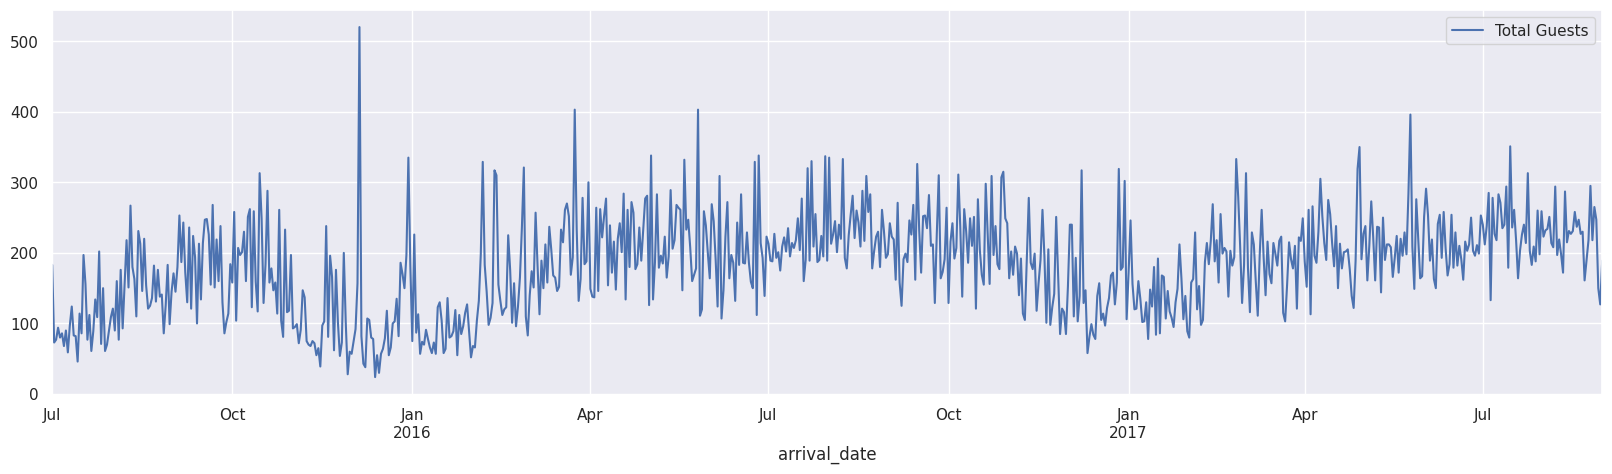

In [57]:
NumberOfGuests_Daily.plot(figsize=(20,5))

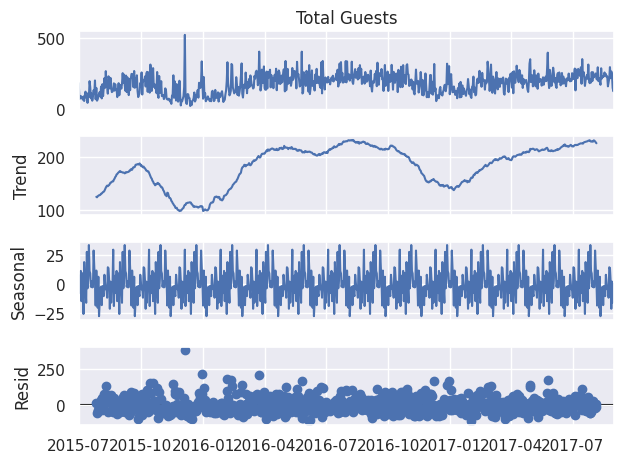

In [58]:
decomposition = sm.tsa.seasonal_decompose(NumberOfGuests_Daily['Total Guests'],
                                         model = 'additive',
                                         period=53 #52 to 53 weeks in a year
                                         )
fig = decomposition.plot()
plt.show()

## ARIMA

In [59]:
from statsmodels.tsa.stattools import adfuller

def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [60]:
adf_test(NumberOfGuests_Daily['Total Guests'])

Results of Dickey-Fuller Test:
Test Statistic                  -2.587978
p-value                          0.095508
#Lags Used                      20.000000
Number of Observations Used    772.000000
Critical Value (1%)             -3.438849
Critical Value (5%)             -2.865291
Critical Value (10%)            -2.568767
dtype: float64


In [61]:
from statsmodels.tsa.stattools import kpss
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c', nlags="auto")
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

In [62]:
kpss_test(NumberOfGuests_Daily['Total Guests'])

Results of KPSS Test:
Test Statistic            1.543747
p-value                   0.010000
Lags Used                16.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


In [63]:
def obtain_adf_kpss_results(timeseries, max_d):
    results=[]

    for idx in range(max_d):
        adf_result = adfuller(timeseries, autolag='AIC')
        kpss_result = kpss(timeseries, regression='c', nlags="auto")
        timeseries = timeseries.diff().dropna()
        if adf_result[1] <=0.05:
            adf_stationary = True
        else:
            adf_stationary = False
        if kpss_result[1] <=0.05:
            kpss_stationary = False
        else:
            kpss_stationary = True

        stationary = adf_stationary & kpss_stationary

        results.append((idx,adf_result[1], kpss_result[1],adf_stationary,kpss_stationary, stationary))

    # Construct DataFrame
    results_df = pd.DataFrame(results, columns=['d','adf_stats','p-value', 'is_adf_stationary','is_kpss_stationary','is_stationary' ])

    return results_df

In [64]:
obtain_adf_kpss_results(NumberOfGuests_Daily, 3)

,d,adf_stats,p-value,is_adf_stationary,is_kpss_stationary,is_stationary
0,0,9.550752e-02,0.01,False,False,False
1,1,3.922549e-18,0.10,True,True,True
2,2,4.822310e-23,0.10,True,True,True


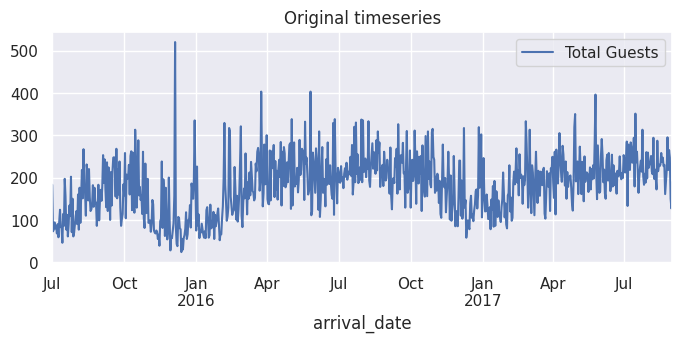

In [65]:
NumberOfGuests_Daily.plot(grid=True,figsize=(8,3), title = "Original timeseries" )
plt.show()

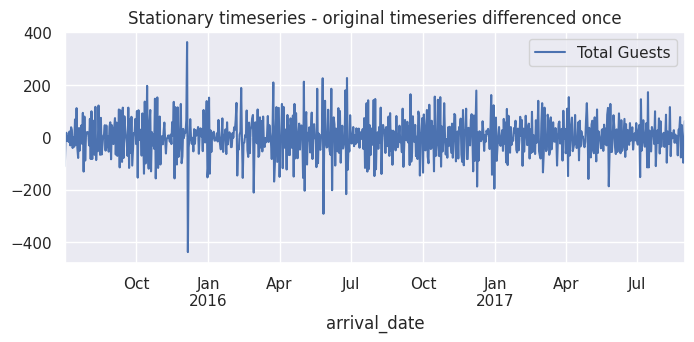

In [66]:
NumberOfGuests_Daily.diff().dropna().plot(grid=True,figsize=(8,3), title = "Stationary timeseries - original timeseries differenced once" )
plt.show()

### Plot ACF and PACF

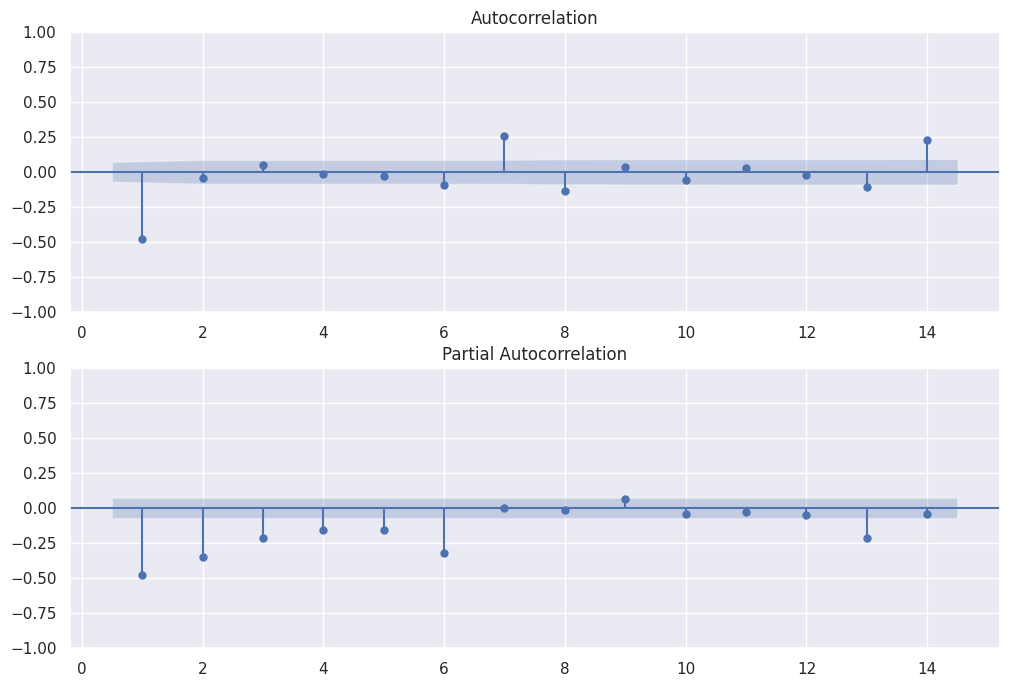

In [67]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))

# Plot the ACF of NumberOfGuests_Daily
plot_acf(NumberOfGuests_Daily.diff().dropna(),lags=14, zero=False, ax=ax1)

# Plot the PACF of NumberOfGuests_Daily
plot_pacf(NumberOfGuests_Daily.diff().dropna(),lags=14, zero=False, ax=ax2)

plt.show()

In [68]:
NumberOfGuests_Daily.index = pd.DatetimeIndex(NumberOfGuests_Daily.index.values,
                               freq=NumberOfGuests_Daily.index.inferred_freq)

In [69]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(NumberOfGuests_Daily, order=(1,1,1), freq='D')
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           Total Guests   No. Observations:                  793
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -4324.878
Date:                Sun, 29 Sep 2024   AIC                           8655.755
Time:                        16:22:15   BIC                           8669.779
Sample:                    07-01-2015   HQIC                          8661.145
                         - 08-31-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0234      0.036      0.657      0.511      -0.046       0.093
ma.L1         -0.8960      0.017    -52.295      0.000      -0.930      -0.862
sigma2      3234.2884     98.528     32.826      0.000    3041.178    3427.399
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               660.35
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.62   Skew:                             1.10
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [70]:
# Create empty list to store search results
order_aic_bic=[]

# Loop over p values from 0-6
for p in range(7):
  # Loop over q values from 0-6
    for q in range(7):
      	# create and fit ARMA(p,q) model
        model = SARIMAX(NumberOfGuests_Daily, order=(p,1,q), freq="D") #because adf test showed that d=1
        results = model.fit()

        # Append order and results tuple
        order_aic_bic.append((p,q,results.aic, results.bic))

In [71]:
# Construct DataFrame from order_aic_bic
order_df = pd.DataFrame(order_aic_bic,
                        columns=['p','q','AIC','BIC'])
order_df.sort_values('AIC')

,p,q,AIC,BIC
48,6,6,8605.473982,8666.243280
41,5,6,8608.452305,8664.547041
47,6,5,8615.322365,8671.417102
27,3,6,8626.601950,8673.347564
42,6,0,8630.262170,8662.984100
45,6,3,8631.631452,8678.377066
43,6,1,8632.190062,8669.586553
46,6,4,8632.734820,8684.154995
44,6,2,8633.459668,8675.530720
19,2,5,8634.825763,8672.222254


In [72]:
#AIC agree the best model in this case should be ARIMA(6,1,6). So I choice ARIMA(6,1,6)
df_train = NumberOfGuests_Daily[:701]
df_test = NumberOfGuests_Daily[701:]
arima_model = SARIMAX(df_train, order=(6,1,6))
arima_results = arima_model.fit()
yhat = arima_results.forecast(len(df_test))
MAE_1 = mean_absolute_error(df_test, yhat)
# Print mean absolute error
print('MAE: %.3f' % MAE_1)
MAPE_1 = mean_absolute_percentage_error(df_test, yhat)
print('MAPE: %.3f' % MAPE_1)

MAE: 30.895
MAPE: 0.142


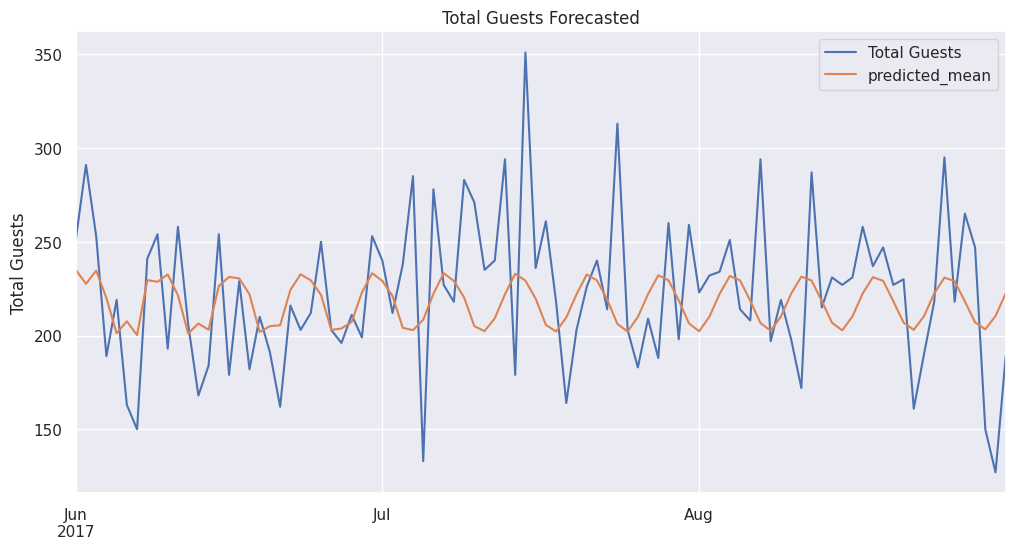

In [73]:
ax = df_test['Total Guests'].plot(legend=True,figsize=(12,6),title='Total Guests Forecasted')
yhat.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(ylabel='Total Guests');

In [74]:
arima_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           Total Guests   No. Observations:                  701
Model:               SARIMAX(6, 1, 6)   Log Likelihood               -3815.252
Date:                Sun, 29 Sep 2024   AIC                           7656.503
Time:                        16:24:03   BIC                           7715.667
Sample:                    07-01-2015   HQIC                          7679.374
                         - 05-31-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9680      0.244     -3.964      0.000      -1.447      -0.489
ar.L2         -0.1814      0.116     -1.568      0.117      -0.408       0.045
ar.L3         -0.4998      0.073     -6.870      0.000      -0.642      -0.357
ar.L4         -1.1671      0.141     -8.279      0.000      -1.443      -0.891
ar.L5         -0.5574      0.223     -2.505      0.012      -0.993      -0.121
ar.L6         -0.1146      0.057     -2.008      0.045      -0.227      -0.003
ma.L1          0.1094      0.250      0.437      0.662      -0.381       0.599
ma.L2         -0.7112      0.126     -5.644      0.000      -0.958      -0.464
ma.L3          0.3314      0.158      2.091      0.036       0.021       0.642
ma.L4          0.7642      0.182      4.196      0.000       0.407       1.121
ma.L5         -0.4449      0.119     -3.751      0.000      -0.677      -0.212
ma.L6         -0.4216      0.199     -2.118      0.034      -0.812      -0.031
sigma2      3294.6958    111.979     29.423      0.000    3075.222    3514.170
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               750.76
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.74   Skew:                             1.15
Prob(H) (two-sided):                  0.02   Kurtosis:                         7.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [75]:
# Take the first and seasonal differences (S=7) and drop NaNs
NumberOfGuests_Daily_diff = NumberOfGuests_Daily.diff().diff(7).dropna()

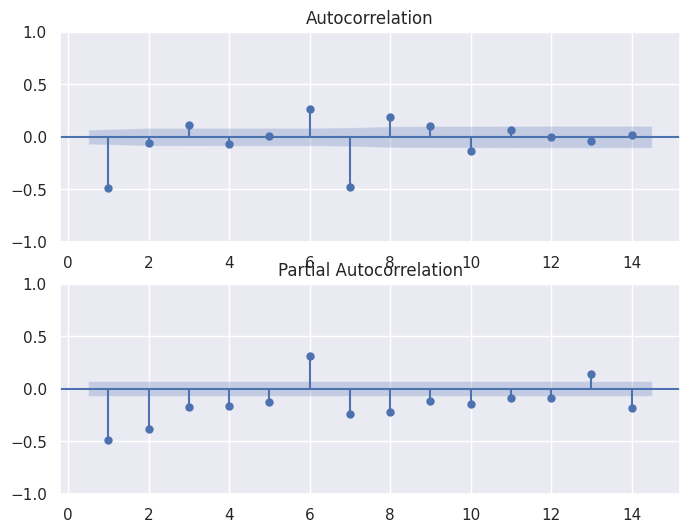

In [76]:
# Create the figure
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(8,6))

# Plot the ACF on ax1
plot_acf(NumberOfGuests_Daily_diff, lags=14, zero=False, ax=ax1)

# Plot the PACF on ax2
plot_pacf(NumberOfGuests_Daily_diff, lags=14, zero=False, ax=ax2)

plt.show()

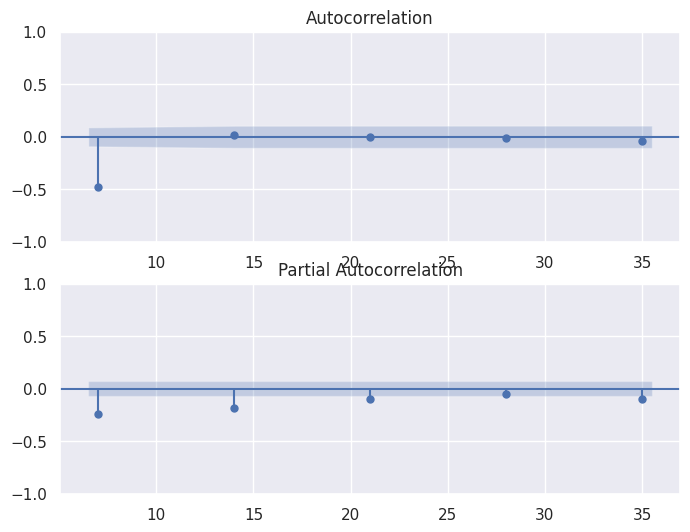

In [77]:
# Make list of lags
lags = [7, 14, 21, 28, 35]

# Create the figure
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(8,6))

# Plot the ACF on ax1
plot_acf(NumberOfGuests_Daily_diff, lags=lags, zero=False, ax=ax1)

# Plot the PACF on ax2
plot_pacf(NumberOfGuests_Daily_diff, lags=lags, zero=False, ax=ax2)

plt.show()

In [78]:
sarima_01_model = SARIMAX(df_train, order=(0,1,6), seasonal_order=(0,1,1,7))

sarima_01_results = sarima_01_model.fit()
yhat = sarima_01_results.forecast(len(df_test))
MAE_2 = mean_absolute_error(df_test, yhat)

# Print mean absolute error
print('MAE: %.3f' % MAE_2)

MAPE_2 = mean_absolute_percentage_error(df_test, yhat)
print('MAPE: %.3f' % MAPE_2)

MAE: 29.702
MAPE: 0.141


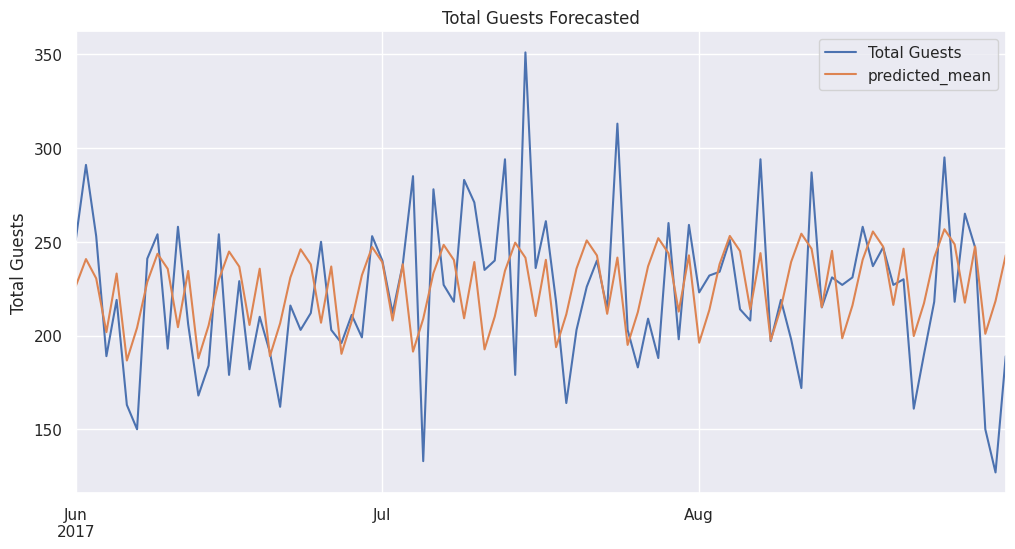

In [79]:
ax = df_test['Total Guests'].plot(legend=True,figsize=(12,6),title='Total Guests Forecasted')
yhat.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(ylabel='Total Guests');

In [80]:
sarima_01_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                        Total Guests   No. Observations:                  701
Model:             SARIMAX(0, 1, 6)x(0, 1, [1], 7)   Log Likelihood               -3777.036
Date:                             Sun, 29 Sep 2024   AIC                           7570.072
Time:                                     16:24:08   BIC                           7606.400
Sample:                                 07-01-2015   HQIC                          7584.121
                                      - 05-31-2017                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8694      0.033    -26.185      0.000      -0.934      -0.804
ma.L2         -0.0238      0.041     -0.584      0.559      -0.104       0.056
ma.L3          0.0848      0.047      1.816      0.069      -0.007       0.176
ma.L4         -0.0436      0.054     -0.802      0.423      -0.150       0.063
ma.L5         -0.0287      0.056     -0.512      0.608      -0.138       0.081
ma.L6         -0.0048      0.044     -0.110      0.913      -0.090       0.081
ma.S.L7       -0.9985      0.115     -8.711      0.000      -1.223      -0.774
sigma2      3022.6509    343.251      8.806      0.000    2349.892    3695.410
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               732.31
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.74   Skew:                             1.08
Prob(H) (two-sided):                  0.02   Kurtosis:                         7.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Automated Model Selection

In [81]:
import pmdarima as pm
model1 = pm.auto_arima(NumberOfGuests_Daily, #time series
                      seasonal=True, # is the time series seasonal
                      m=7, # the seasonal period - one week?
                      d=1, # non-seasonal difference order
                      D=1, # seasonal difference order
                 	  max_p=6, # max value of p to test
                      max_q=6, # max value of p to test
                      max_P=6, # max value of P to test
                      max_Q=6, # max value of Q to test
                      information_criterion='aic', # used to select best mode
                      trace=True, # prints the information_criterion for each model it fits
                      error_action='ignore', # ignore orders that don't work
                      stepwise=True, # apply an intelligent order search
                      suppress_warnings=True)
print(model1.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[7]             : AIC=inf, Time=7.88 sec
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=9333.967, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=8914.356, Time=0.35 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=inf, Time=1.28 sec
 ARIMA(1,1,0)(0,1,0)[7]             : AIC=9124.484, Time=0.07 sec
 ARIMA(1,1,0)(2,1,0)[7]             : AIC=8848.926, Time=0.78 sec
 ARIMA(1,1,0)(3,1,0)[7]             : AIC=8829.628, Time=1.29 sec
 ARIMA(1,1,0)(4,1,0)[7]             : AIC=8814.348, Time=2.04 sec
 ARIMA(1,1,0)(5,1,0)[7]             : AIC=8793.116, Time=5.25 sec
 ARIMA(1,1,0)(6,1,0)[7]             : AIC=8788.420, Time=6.09 sec
 ARIMA(1,1,0)(6,1,1)[7]             : AIC=inf, Time=20.91 sec
 ARIMA(1,1,0)(5,1,1)[7]             : AIC=inf, Time=20.12 sec
 ARIMA(0,1,0)(6,1,0)[7]             : AIC=9008.903, Time=5.95 sec
 ARIMA(2,1,0)(6,1,0)[7]             : AIC=8683.209, Time=4.72 sec
 ARIMA(2,1,0)(5,1,0)[7]             : AIC=8688.806,

In [82]:
sarima_02_model = SARIMAX(df_train, order=(6,1,0), seasonal_order=(6,1,0,7))
sarima_02_results = sarima_02_model.fit()

yhat = sarima_02_results.forecast(len(df_test))
MAE_3 = mean_absolute_error(df_test, yhat)

print('MAE: %.3f' % MAE_3)

MAPE_3 = mean_absolute_percentage_error(df_test, yhat)
print('MAPE: %.3f' % MAPE_3)

MAE: 33.564
MAPE: 0.155


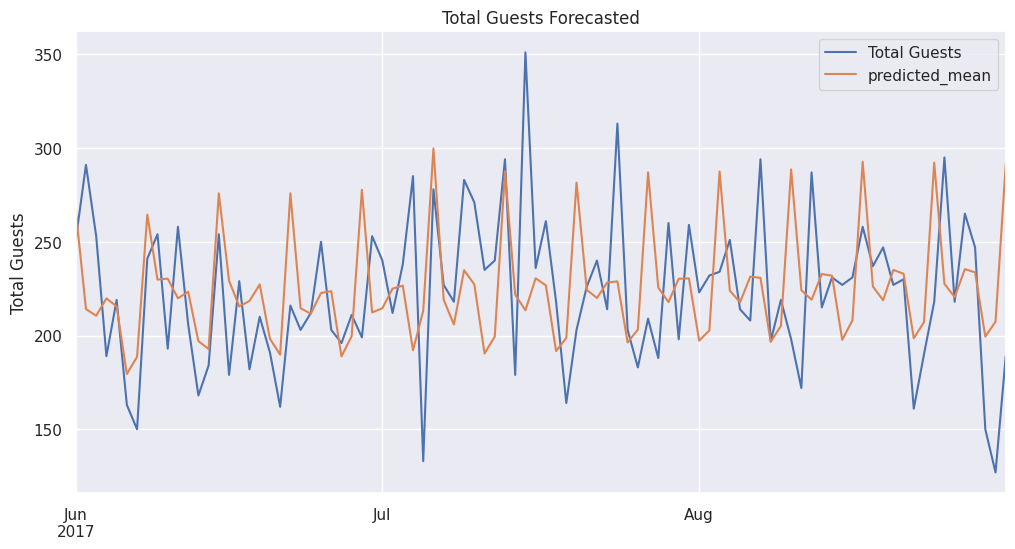

In [83]:
ax = df_test['Total Guests'].plot(legend=True,figsize=(12,6),title='Total Guests Forecasted')
yhat.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(ylabel='Total Guests');

In [84]:
df_arima_results = pd.DataFrame({'metrics':['MAE','MAPE'],
              'ARIMA(6,1,6)':[round(MAE_1,3),
                 round(MAPE_1,4)],
              'SARIMA(0,1,6)(0,1,1)7':[round(MAE_2,3),
                 round(MAPE_2,4)],
              'SARIMA(6,1,0)(6,1,0)7':[round(MAE_3,3),
                 round(MAPE_3,4)]
             })

df_arima_results

,metrics,"ARIMA(6,1,6)","SARIMA(0,1,6)(0,1,1)7","SARIMA(6,1,0)(6,1,0)7"
0,MAE,30.8950,29.7020,33.5640
1,MAPE,0.1421,0.1411,0.1555


### Forecasting for next 6 months

In [85]:
sarima_02_model = SARIMAX(df_train, order=(6,1,0), seasonal_order=(6,1,0,7))
sarima_02_results = sarima_02_model.fit()

n_months = 8
days_in_month = 30
forecast_steps = n_months * days_in_month

yhat = sarima_02_results.forecast(steps=forecast_steps)

In [86]:
# ax = NumberOfGuests_Daily['Total Guests'].plot(legend=True,figsize=(12,6),title='Total Guests Forecasted')
fig = px.line(yhat, title='Forecaste for Hotel next 6 months', color_discrete_sequence=[colors[0]])
fig.update_layout(yaxis_title='Total Guests', xaxis_title='Date')  # Add x-axis label if needed
fig.show()

### Forecasting According to the hotel type

In [87]:
resort_guests = dataNoCancel[dataNoCancel['hotel'] == 'Resort Hotel'][['arrival_date', 'Total Guests']].reset_index(drop=True)
city_guests = dataNoCancel[dataNoCancel['hotel'] == 'City Hotel'][['arrival_date', 'Total Guests']].reset_index(drop=True)

In [88]:
resort_guests.head()

,arrival_date,Total Guests
0,2015-07-01,2.0
1,2015-07-01,2.0
2,2015-07-01,1.0
3,2015-07-01,1.0
4,2015-07-01,2.0


In [89]:
city_guests.head()

,arrival_date,Total Guests
0,2015-07-01,1.0
1,2015-07-02,1.0
2,2015-07-03,2.0
3,2015-07-03,2.0
4,2015-07-03,2.0


In [90]:
NumberOfGuests_Resort = dataNoCancel[dataNoCancel['hotel'] == 'Resort Hotel'][['arrival_date', 'Total Guests']]
NumberOfGuests_Resort_Daily = dataNoCancel[dataNoCancel['hotel'] == 'Resort Hotel']['Total Guests'].groupby(dataNoCancel['arrival_date']).sum()
NumberOfGuests_Resort_Daily = NumberOfGuests_Resort_Daily.resample('d').sum().to_frame()

NumberOfGuests_City = dataNoCancel[dataNoCancel['hotel'] == 'City Hotel'][['arrival_date', 'Total Guests']]
NumberOfGuests_City_Daily = dataNoCancel[dataNoCancel['hotel'] == 'City Hotel']['Total Guests'].groupby(dataNoCancel['arrival_date']).sum()
NumberOfGuests_City_Daily = NumberOfGuests_City_Daily.resample('d').sum().to_frame()

In [91]:
lis_resort = []
for x in NumberOfGuests_Resort_Daily.index:
    lis_resort.append(x.day_name())
days_resort = pd.DataFrame(lis_resort, columns=['Day'])
NumberOfGuestsDaily_Resort = NumberOfGuests_Resort_Daily.copy()
NumberOfGuestsDaily_Resort.reset_index(drop=True, inplace=True)
NumberOfGuestsDaily_Resort = NumberOfGuestsDaily_Resort.join(days_resort)

lis_city = []
for x in NumberOfGuests_City_Daily.index:
    lis_city.append(x.day_name())
days_city = pd.DataFrame(lis_city, columns=['Day'])
NumberOfGuestsDaily_City = NumberOfGuests_City_Daily.copy()
NumberOfGuestsDaily_City.reset_index(drop=True, inplace=True)
NumberOfGuestsDaily_City = NumberOfGuestsDaily_City.join(days_city)

In [92]:
# For Resort Hotel
fig_resort = px.line(NumberOfGuests_Resort_Daily.reset_index(), x='arrival_date', y='Total Guests', title='Resort Hotel Demand')
fig_resort.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label='1y', step="year", stepmode="backward"),
            dict(count=2, label='2y', step="year", stepmode="backward"),
            dict(count=3, label='3y', step="year", stepmode="backward")
        ])
    )
)
fig_resort.show()

In [93]:
# For City Hotel
fig_city = px.line(NumberOfGuests_City_Daily.reset_index(), x='arrival_date', y='Total Guests', title='City Hotel Demand')
fig_city.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label='1y', step="year", stepmode="backward"),
            dict(count=2, label='2y', step="year", stepmode="backward"),
            dict(count=3, label='3y', step="year", stepmode="backward")
        ])
    )
)
fig_city.show()

In [94]:
df_train_resort = NumberOfGuests_Resort_Daily[:701]
df_test_resort = NumberOfGuests_Resort_Daily[701:]

sarima_02_model = SARIMAX(df_train_resort, order=(6,1,0), seasonal_order=(6,1,0,7))
sarima_02_results = sarima_02_model.fit()

yhat = sarima_02_results.forecast(len(df_test_resort))
MAE_3 = mean_absolute_error(df_test_resort, yhat)

# Print mean absolute error
print('MAE: %.3f' % MAE_3)

MAPE_3 = mean_absolute_percentage_error(df_test_resort, yhat)
print('MAPE: %.3f' % MAPE_3)


MAE: 20.455
MAPE: 0.290


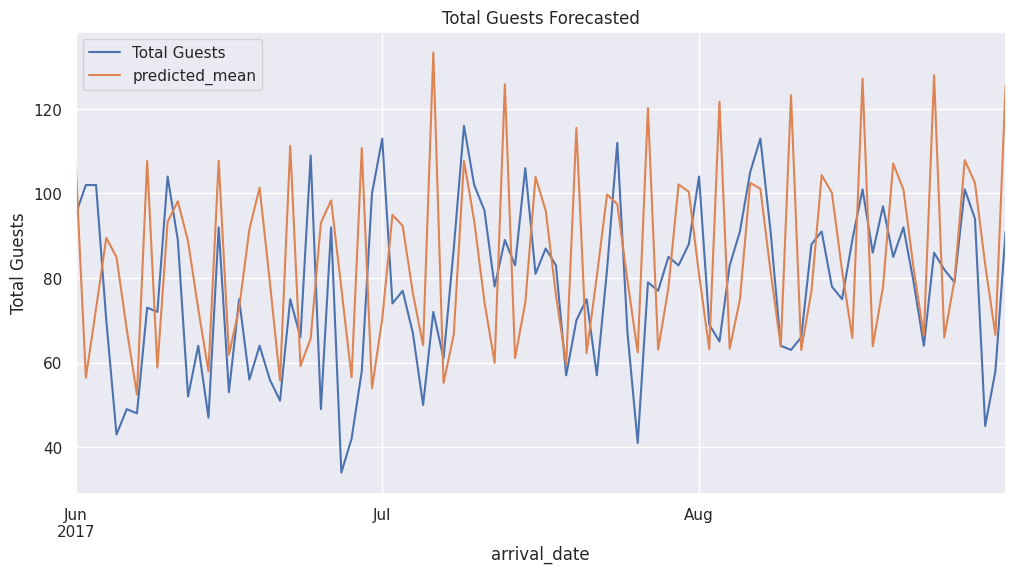

In [95]:
ax = df_test_resort['Total Guests'].plot(legend=True,figsize=(12,6),title='Total Guests Forecasted')
yhat.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(ylabel='Total Guests');

In [96]:
n_months = 9
days_in_month = 30
forecast_steps = n_months * days_in_month

y_resort_pred = sarima_02_results.forecast(steps=forecast_steps)

In [97]:
fig = px.line(y_resort_pred, title='Resort Hotel Forecaste for next 6 months', color_discrete_sequence=[colors[0]])
fig.update_layout(yaxis_title='Total Guests', xaxis_title='Date')  # Add x-axis label if needed
fig.show()

In [98]:
df_train_city = NumberOfGuests_City_Daily[:701]
df_test_city = NumberOfGuests_City_Daily[701:]

sarima_02_model = SARIMAX(df_train_city, order=(6,1,0), seasonal_order=(6,1,0,7))
sarima_02_results = sarima_02_model.fit()


yhat = sarima_02_results.forecast(len(df_test_city))
MAE_3 = mean_absolute_error(df_test_city, yhat)

# Print mean absolute error
print('MAE: %.3f' % MAE_3)

MAPE_3 = mean_absolute_percentage_error(df_test_city, yhat)
print('MAPE: %.3f' % MAPE_3)

MAE: 26.909
MAPE: 0.199


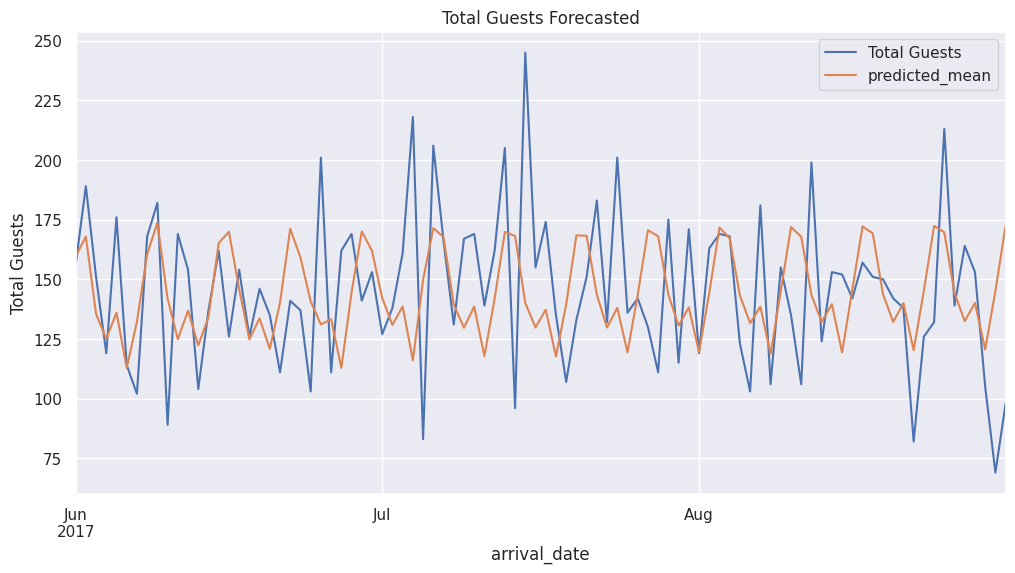

In [99]:
ax = df_test_city['Total Guests'].plot(legend=True,figsize=(12,6),title='Total Guests Forecasted')
yhat.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(ylabel='Total Guests');

In [100]:
n_months = 9
days_in_month = 30
forecast_steps = n_months * days_in_month

y_city_pred = sarima_02_results.forecast(steps=forecast_steps)

In [101]:
fig = px.line(y_city_pred, title='City Hotel Forecaste for next 6 months', color_discrete_sequence=[colors[0]])
fig.update_layout(yaxis_title='Total Guests', xaxis_title='Date')  # Add x-axis label if needed
fig.show()